In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalizar los datos
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convertir las etiquetas a vectores one-hot
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 [==============================] - 4s 0us/step


In [2]:
# Definir la arquitectura del modelo
model = keras.Sequential(
    [
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)


In [3]:
# Compilar el modelo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [4]:
# Entrenar el modelo
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/10
704/704 [==============================] - 46s 64ms/step - loss: 1.6148 - accuracy: 0.4181 - val_loss: 1.3138 - val_accuracy: 0.5382
Epoch 2/10
704/704 [==============================] - 40s 57ms/step - loss: 1.3184 - accuracy: 0.5356 - val_loss: 1.1829 - val_accuracy: 0.5874
Epoch 3/10
704/704 [==============================] - 40s 57ms/step - loss: 1.2022 - accuracy: 0.5782 - val_loss: 1.0839 - val_accuracy: 0.6296
Epoch 4/10
704/704 [==============================] - 39s 56ms/step - loss: 1.1308 - accuracy: 0.6037 - val_loss: 1.0283 - val_accuracy: 0.6450
Epoch 5/10
704/704 [==============================] - 41s 58ms/step - loss: 1.0822 - accuracy: 0.6238 - val_loss: 0.9710 - val_accuracy: 0.6698
Epoch 6/10
704/704 [==============================] - 41s 58ms/step - loss: 1.0406 - accuracy: 0.6389 - val_loss: 0.9440 - val_accuracy: 0.6846
Epoch 7/10
704/704 [==============================] - 42s 59ms/step - loss: 1.0130 - accuracy: 0.6482 - val_loss: 0.9535 - val_accuracy:

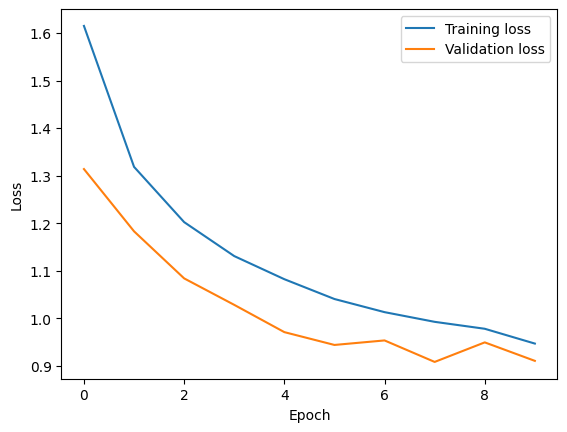

In [5]:
import matplotlib.pyplot as plt

# Graficar la pérdida
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


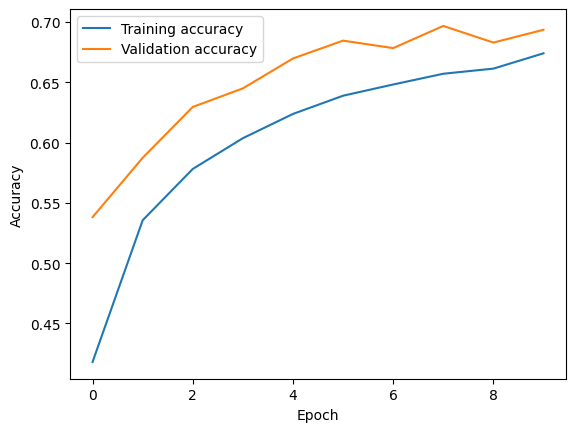

In [6]:
# Graficar la precisión
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

313/313 [==============================] - 3s 9ms/step
Matriz de Confusión:
 [[753  29  53   5  21   6  10   5  90  28]
 [ 39 836  10   4   7   1   9   1  40  53]
 [ 75   9 611  42 109  31  69  25  21   8]
 [ 31  16 132 464 108  63  93  35  42  16]
 [ 30   6  66  34 722   4  58  54  22   4]
 [ 26   8 138 217  82 402  42  50  25  10]
 [ 10   5  60  42  57   4 800   4  15   3]
 [ 26   5  67  43  87  18  10 721   5  18]
 [ 78  32  15   7   6   0   3   1 843  15]
 [ 38 133  20  11   8   2  11   8  70 699]]


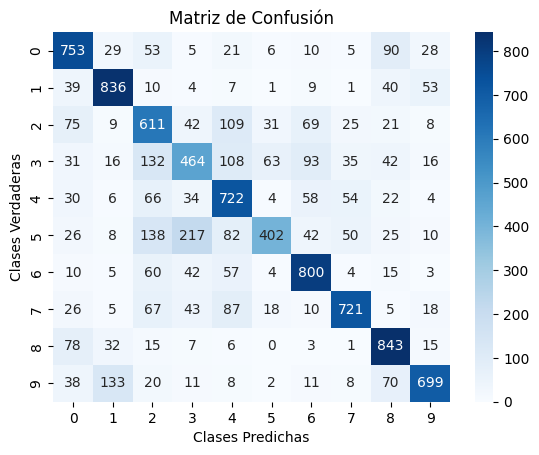

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtenemos las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtenemos las clases verdaderas del conjunto de prueba
y_true = np.argmax(y_test, axis=1)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Imprimimos la matriz de confusión
print("Matriz de Confusión:\n", cm)

# Creamos una visualización de la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")
plt.show()


Testing the model

In [25]:
test_image = x_test[0]
test_label = y_test[0]


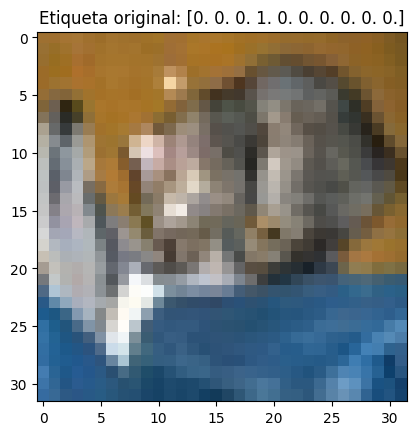

In [26]:
import matplotlib.pyplot as plt

plt.imshow(test_image)
plt.title(f'Etiqueta original: {test_label}')
plt.show()


In [27]:
import numpy as np

pred = model.predict(test_image[np.newaxis])
pred_class = np.argmax(pred)


1/1 [==============================] - 0s 24ms/step


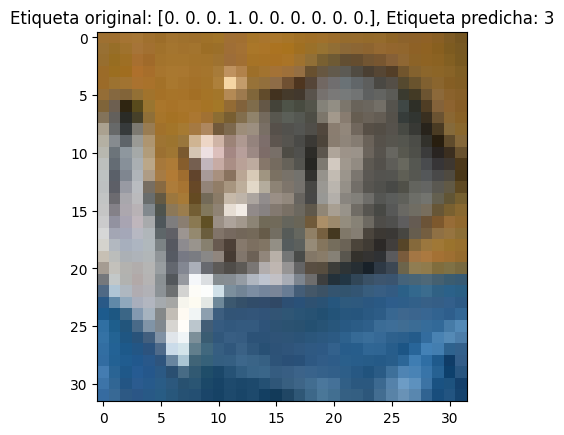

In [28]:
plt.imshow(test_image)
plt.title(f'Etiqueta original: {test_label}, Etiqueta predicha: {pred_class}')
plt.show()
